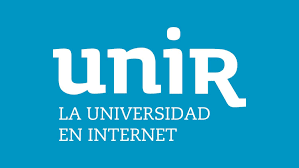

# Resolución de un problema mediante búsqueda heurística

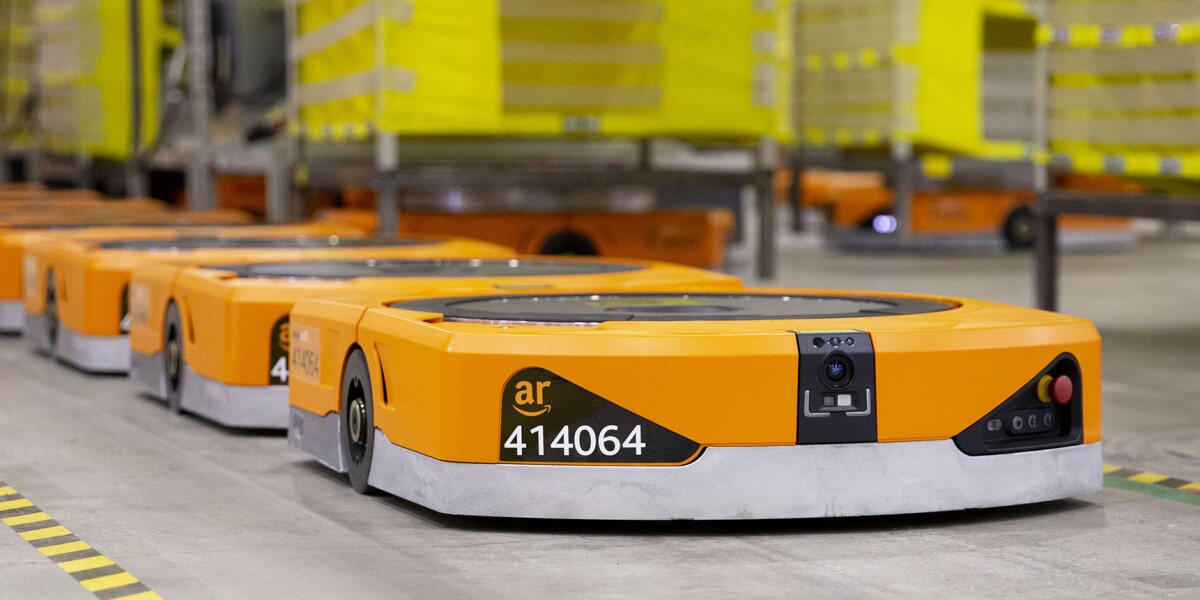

Equipo : 
- Diego Alexis Galván Sandoval
- Marcos Lopéz
- Dennis
- Alberto

### 1. Objetivo: 
Implementar la estrategia de búsqueda heurística A* para la resolución de un problema real.

### 2. Problematica: 
La empresa Amazon desea utilizar un robot para ordenar el inventario de su almacén. Amazon cuenta con tres inventarios (mesa con suministros para vender) localizados en unas posiciones específicas del almacén. El robot se debe encargar de mover los tres inventarios a una posición objetivo. El robot puede moverse horizontal y verticalmente, y cargar o descargar un inventario. 

En esta actividad has de utilizar la estrategia de búsqueda heurística A* con el fin de generar un plan que permita al robot de Amazon mover el inventario de un estado inicial a un estado objetivo.

#### 2.1 Estado Inicial

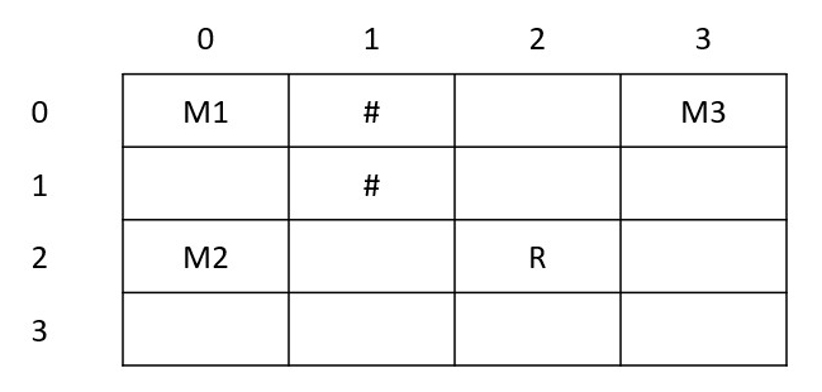

En el gráfico de arriba, vemos los tres inventarios en sus posiciones originales marcados con la letra M seguida de un número. Los signos # simbolizan un bloqueo donde el robot no puede pasar. Finalmente, la letra R indica la posición inicial del robot.

#### 2.2 Estado Objetivo

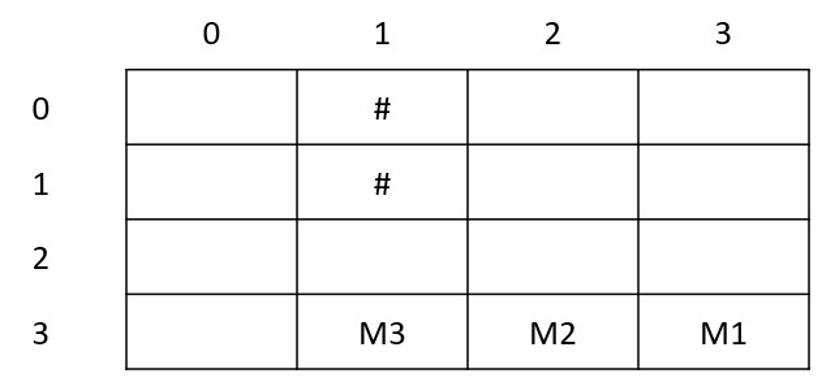

El gráfico anterior, muestra las posiciones finales de los tres inventarios. Este es el objetivo que el robot debe cumplir.

#### 2.3 Distancia Manhattan

LA métrica a utlizar como función heurística es la conocida distancia Manhattan. La distancia Manhattan, también conocida como distancia de la ciudad, distancia de bloques o distancia L1, es una métrica utilizada para medir la distancia entre dos puntos en una cuadrícula basada en el movimiento ortogonal (es decir, solo en direcciones paralelas a los ejes). Se llama así porque se asemeja a la forma en que uno se movería a través de las calles de una ciudad como Manhattan, donde las calles forman una cuadrícula regular. Si consideramos dos puntos como $P1 = (x_1,y_1)$ y  $P2=(x_2,y_2)$ entonces la distancia Manhattan se define como:

$$ d_{Manhattan}(P1,P2) = |x_2-x_1|+|y_2-y_1| $$

#### 2.4 Tareas pedidas
Implementar el algoritmo A* considerando lo siguiente:

1.	Cómo función heurística, la Distancia en Manhattan.
2.	El coste real (g) de cada acción del robot es 1.
3.	El código deberá ejecutarse e indicar la secuencia de acciones necesarias para alcanzar el estado objetivo utilizando una notación sencilla. Por ejemplo: «mover R fila1 columna2» o «mover R fila0 columna2» o «cargar R M1 fila0 columna2».


### 3. Solución: Implementación del algoritmo A*

#### 3.1 Breve Introducción al algoritmo A*
El algoritmo A* (A estrella) es un algoritmo de búsqueda utilizado en la informática e inteligencia artificial para encontrar el camino más corto desde un punto inicial a un punto objetivo en un grafo. Es una extensión del algoritmo de Dijkstra que incorpora heurísticas para mejorar la eficiencia de la búsqueda. El algoritmo es utilizado en aplicaciones como la navegación de robots, los juegos de video y los sistemas de GPS. A* combina las ventajas del algoritmo de Dijkstra con una heurística que permite reducir el número de nodos explorados, lo que lo hace más eficiente. 

Un ejemplo del algortimo de A* es el siguiente:

Inicialización:

Coloca el nodo inicial en una estructura de datos llamada "cola de prioridad abierta" (open list) con $g=0$ y $f=h$.
Crea una lista vacía llamada "lista cerrada" (closed list) para los nodos que ya han sido evaluados.

Bucle Principal:

Mientras la lista abierta no esté vacía, realiza los siguientes pasos:

Selección del Nodo a Explorar:

Extrae el nodo n de la lista abierta con el valor de f más bajo.
Si n es el nodo objetivo, el algoritmo termina y se reconstruye el camino óptimo desde el nodo inicial hasta n.

Expansión de Vecinos:

 Para cada vecino m del nodo n:
- Calcula el costo $g(m)=g(n)+costo(n,m)$.
- Calcula la heurística $h(m)$.
- Calcula $f(m)=g(m)+h(m)$.

Actualización de la Lista Abierta:

Si m no está en la lista abierta o si se ha encontrado un camino más corto hacia m:
- Actualiza $g(m)$, $h(m)$ y $f(m)$.
- Establece nn como el predecesor de m.
- Si m no está en la lista abierta, añádelo.
- Si m ya está en la lista abierta, actualiza su posición según el nuevo valor de $f(m)$.

Mover el Nodo a la Lista Cerrada:

Una vez que todos los vecinos de nn han sido evaluados, mueve n de la lista abierta a la lista cerrada.

#### 3.2 La implementación del código

Definimos la clase nodo, que contendrá la información básica que requiere este modelo

La implementación siguiente está desarrollada en el lenguaje de programación Python. Implementa clases y funciones dirigidas a revolver el problema expuesto anteriormente. Algunas consideraciones que se toman son las siguientes:

- El robot inicia en la posición indicada como R y regresa aquí cada que termina de transportar un inventario para volver a iniciar.
- Las casillas donde se encuentran los inventarios no se toma como un obstaculo.
- Al transportar un inventario, se imprimira los movimientos como "CARGAR" y al estar libre "MOVER". 


Definimos la función Manhattan para calcular distancias entre dos nodos

In [11]:
class Node:
    def __init__(self, pos_x: int, pos_y: int, cost: int, parent=None) -> None:
        self.pos_x: int = pos_x
        self.pos_y: int = pos_y
        self.cost: int = cost
        self.parent = parent

In [12]:

def manhattan(current: Node, next: Node):
    return abs(current.pos_x - next.pos_x) + abs(current.pos_y - next.pos_y)

La función: `{python} get_children(node: Node, map: list[list[int]]) -> list[Node]` retorna una lista de nodos hijos, calculados a partir de la posición (x, y) del nodo que recibe como parámetro y evaluando la validez de las posiciónes circundantes a este.


In [13]:
def get_children(node: Node, map: list[list[int]]) -> list[Node]:
    neighbors = []
    directions = [
        (-1, 0),
        (1, 0),
        (0, -1),
        (0, 1),
    ]

    for offset_x, offset_y in directions:
        pos_x, pos_y = node.pos_x + offset_x, node.pos_y + offset_y
        if (
            0 <= pos_x < len(map)
            and 0 <= pos_y < len(map[0])
            and map[pos_x][pos_y] == 0
        ):
            neighbor: Node = Node(pos_x, pos_y, 0, node)
            neighbor.cost = node.cost + 1
            neighbors.append(neighbor)

    return neighbors

Creamos la función de búsqueda que recibe los dos nodos y el mapa (matríz de 0's y 1's)

Esta función crea una lista con los nodos por vistar y un set de tuplas (estructura de datos que no permite duplicados).

Cada iteración se realizan lo siguientes pasos:

1. ordena la lista de nodos de mayor a menor costo.
2. obtiene el nodo de menor costo.
3. evalua si el la posición del nodo actual coincide con el que buscamos:
    a. En caso de coincidir con el nodo buscado, se agrega la tupla de su posición  a una lista de salida.
    b. se obtiene el nodo padre del nodo actual para la siguiente iteración.
    c. el ciclo se rompe al encontrár el nodo origen ya que este no tendrá definido un "padre".
    d. se retorna la lista con las coordenadas obtenidas para el camino del punto origen al destino.
4. se agrega el nodo actual en el set de visitados.
5. con base en el nodo actual, se calculan los nodos hijos (arriba, abajo, izquierda y derecha)
5. al recorrer cada nodo hijo, evaluamos si ya lo hemos visitado anteriormente
6. en caso de no haber visitado aún el nodo y si tiene un costo menor al costo definido por la heurística manhattan entre el origen y el destino, se añade el nodo a la lista "por visitar"
7. En caso de no encontrar un camino posible, se retorna una lista vacía.

In [14]:
def search_path(start: Node, goal: Node, map: list[list[int]]):
    to_be_visited = [start]
    visited = set()

    while to_be_visited:
        to_be_visited.sort(key=lambda x: x.cost, reverse=True)
        current = to_be_visited.pop()

        if current.pos_x == goal.pos_x and current.pos_y == goal.pos_y:
            path = []
            while current:
                path.append((current.pos_x, current.pos_y))
                current = current.parent
            return path[::-1]

        visited.add((current.pos_x, current.pos_y))

        for child in get_children(current, map):
            if (child.pos_x, child.pos_y) in visited:
                continue

            if child.cost <= goal.cost:
                to_be_visited.append(child)

    return []

La función "move", recibe el nodo robot, el nodo paquete, el nodo meta del paquete y el mapa (matríz de 0's y 1's) realiza los pasos siguientes:

1. Calcula la función manhattan entre el robot y el paquete.
2. Obtiene la lista de coordenadas a seguir para alcanzar el paquete e imprime la ruta.
3. Calcula la función manhattan entre el paquete y el destino reiniciando el costo del paquete a 0 ya que este es nuestro nuevo punto de partida.
4. Obtiene la lista de coordenadas a seguir para alcanzar la meta e imprime la ruta.

In [15]:
def move(robot: Node, package: Node, goal: Node, map: list[list[int]], number: int):
    package.cost = manhattan(robot, package)
    for x, y in search_path(robot, package, map):
        print("mover R fila {}, columna {}".format(x, y))

    package.cost = 0
    goal.cost = manhattan(package, goal)
    for x, y in search_path(package, goal, map):
        print("cargar R M{} fila {}, columna {}".format(number, x, y))
    print("")


Por último definimos nuestra función "main" en donde inicializamos nuestro mapa, creamos nuestro nodo de posición para el robot, la lista de nodos de los paquetes y la lista de las metas.

A continuación iteramos los paquetes y las metas para calcular la ruta robot - paquete, paquete - meta y al finalizar reiniciamos la posición del robor en (2,2)


In [16]:


def main():
    map: list[tuple[int]] = [
        (0, 1, 0, 0), 
        (0, 1, 0, 0), 
        (0, 0, 0, 0), 
        (0, 0, 0, 0)
        ]

    robot: Node = Node(2, 2, 0)
    packages: list[Node] = [Node(0, 0, 0), Node(2, 0, 0), Node(0, 3, 0)]
    goals: list[None] = [Node(3, 3, 0), Node(3, 2, 0), Node(3, 1, 0)]

    for i in range(len(packages)):
        move(robot, packages[i], goals[i], map, i + 1)
        robot.pos_x = 2
        robot.pos_y = 2


main()

mover R fila 2, columna 2
mover R fila 2, columna 1
mover R fila 2, columna 0
mover R fila 1, columna 0
mover R fila 0, columna 0
cargar R M1 fila 0, columna 0
cargar R M1 fila 1, columna 0
cargar R M1 fila 2, columna 0
cargar R M1 fila 3, columna 0
cargar R M1 fila 3, columna 1
cargar R M1 fila 3, columna 2
cargar R M1 fila 3, columna 3

mover R fila 2, columna 2
mover R fila 2, columna 1
mover R fila 2, columna 0
cargar R M2 fila 2, columna 0
cargar R M2 fila 2, columna 1
cargar R M2 fila 3, columna 1
cargar R M2 fila 3, columna 2

mover R fila 2, columna 2
mover R fila 2, columna 3
mover R fila 1, columna 3
mover R fila 0, columna 3
cargar R M3 fila 0, columna 3
cargar R M3 fila 0, columna 2
cargar R M3 fila 1, columna 2
cargar R M3 fila 2, columna 2
cargar R M3 fila 3, columna 2
cargar R M3 fila 3, columna 1



Primera carga del inventario M1

- mover R fila 2, columna 2
- mover R fila 2, columna 1
- mover R fila 2, columna 0
- mover R fila 1, columna 0
- mover R fila 0, columna 0
- cargar R M1 fila 0, columna 0
- cargar R M1 fila 1, columna 0
- cargar R M1 fila 2, columna 0
- cargar R M1 fila 3, columna 0
- cargar R M1 fila 3, columna 1
- cargar R M1 fila 3, columna 2
- cargar R M1 fila 3, columna 3

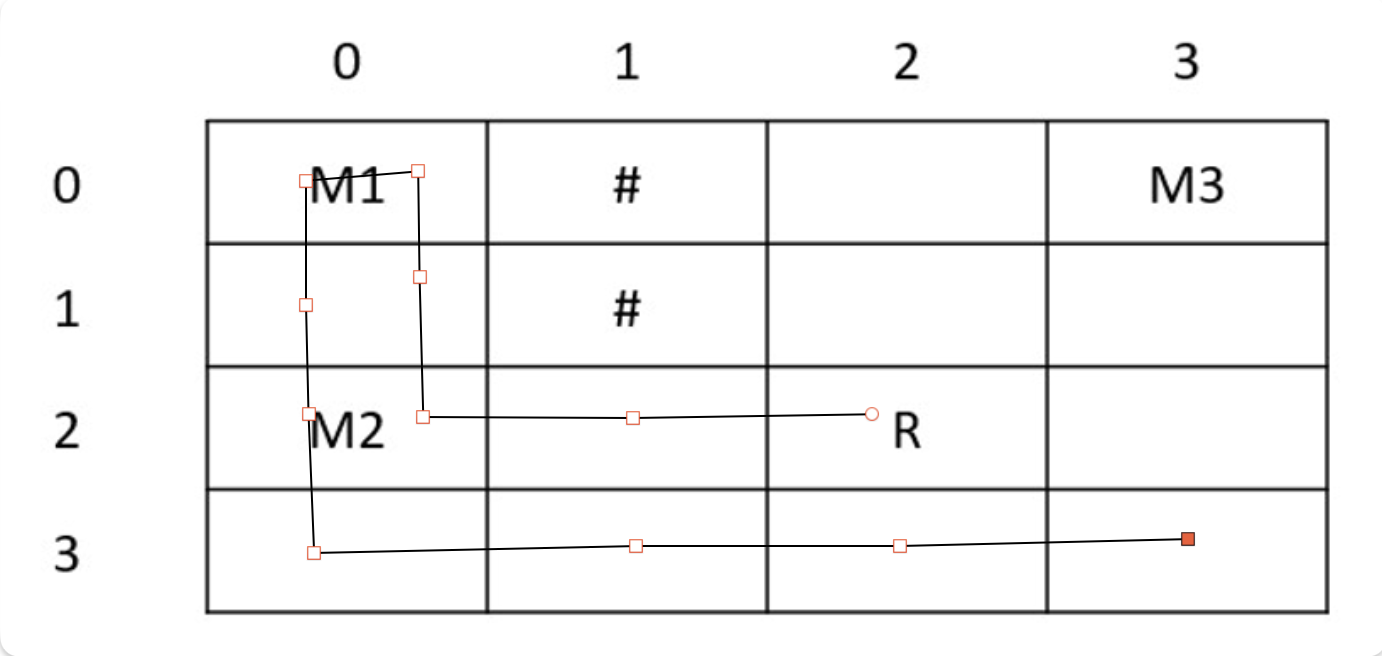

Carga del inventario M2
- mover R fila 2, columna 2
- mover R fila 2, columna 1
- mover R fila 2, columna 0
- cargar R M2 fila 2, columna 0
- cargar R M2 fila 2, columna 1
- cargar R M2 fila 3, columna 1
- cargar R M2 fila 3, columna 2

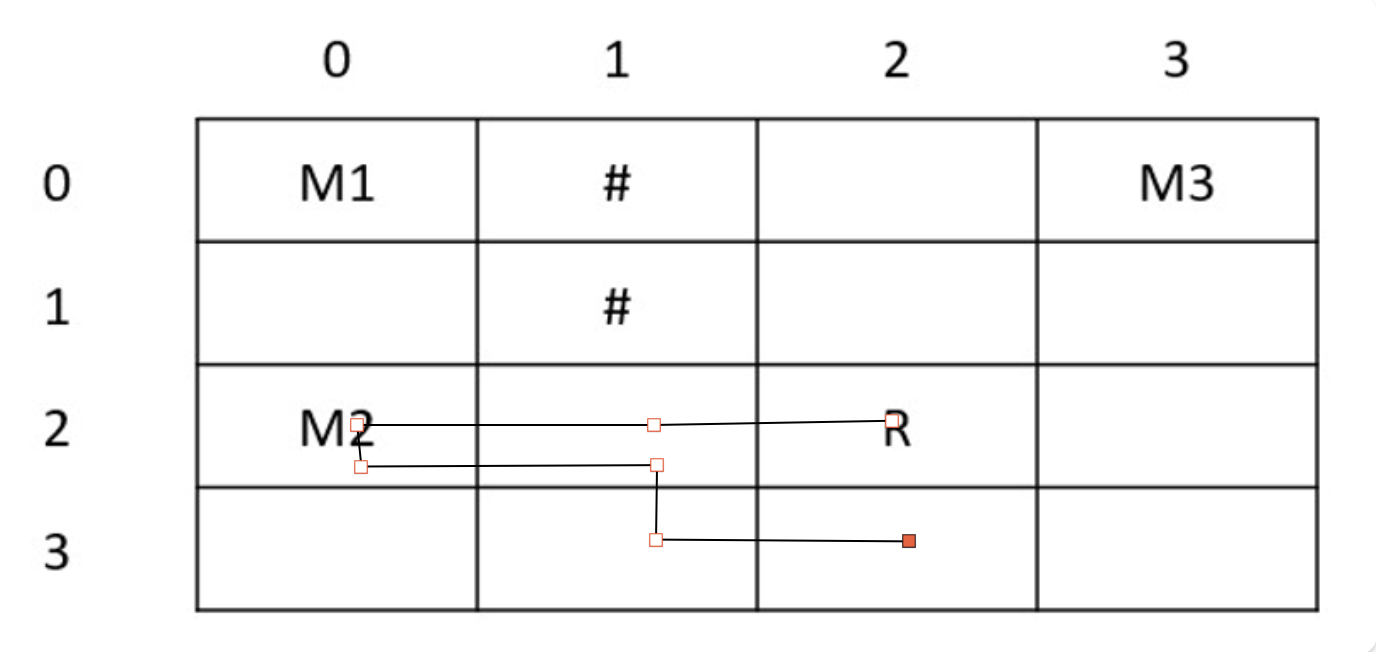

Inventario M3 

- mover R fila 2, columna 2
- mover R fila 2, columna 3
- mover R fila 1, columna 3
- mover R fila 0, columna 3
- cargar R M3 fila 0, columna 3
- cargar R M3 fila 0, columna 2
- cargar R M3 fila 1, columna 2
- cargar R M3 fila 2, columna 2
- cargar R M3 fila 3, columna 2
- cargar R M3 fila 3, columna 1


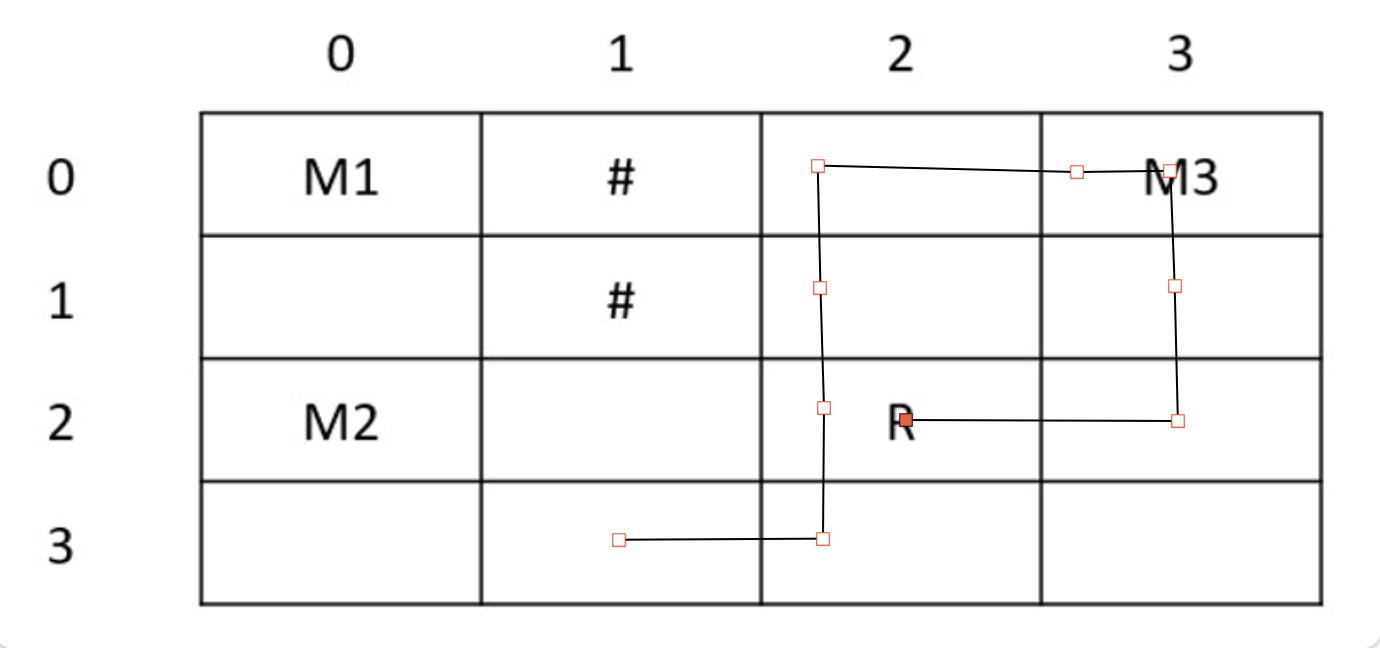

## 4. Referencias